# Vanishing Gradients
Reference: 
[How to Fix the Vanishing Gradients Problem Using the ReLU](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/)

__requirements:__
* original: Keras 2.3 and TensorFlow 2.0 (can not be installed)<br>
* alterantive: https://github.com/keras-team/keras/issues/14632

In [15]:
pip install tensorflow-cpu==2.4.0 keras==2.4.0

     |████████████████████████████████| 175.5 MB 7.7 MB/s eta 0:00:011    |██████▋                         | 36.3 MB 14.9 MB/s eta 0:00:10
     |████████████████████████████████| 170 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 174.2 MB 8.4 MB/s eta 0:00:011
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempt

Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
from tensorflow import keras

## Two Circles Binary Classification Problem

In [4]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

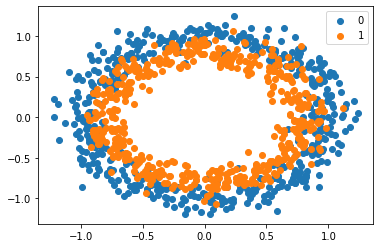

In [5]:
# generate circles
X, y = make_circles(n_samples = 1000, noise = 0.1, random_state = 1)

# select indices of points with each class label
# scatter plot of the circles dataset with points colored by class
for i in range(2):
    samples_ix = np.where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label = str(i))
    
plt.legend()
plt.show()

The __statistical noise__ of the generated samples means that there is some overlap of points between the two circles, adding some ambiguity to the problem, making it non-trivial. 

This is desirable as a neural network may choose one of among many possible solutions to classify the points between the two circles and always make some errors.

## Multilayer Perceptron Model for Two Circles Problem

The model will have an input layer with two inputs, for the two variables in the dataset, one hidden layer with five nodes, and an output layer with one node used to predict the class probability. 

The hidden layer will use the hyperbolic tangent activation function (tanh) and the output layer will use the logistic activation function (sigmoid) to predict class 0 or class 1 or something in between.

Using the hyperbolic tangent activation function in hidden layers was the best practice in the 1990s and 2000s, performing generally better than the logistic function when used in the hidden layer. It was also good practice to initialize the network weights to small random values from a uniform distribution. Here, we will initialize weights randomly from the range [0.0, 1.0].

In [16]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform

In [20]:
import matplotlib.pyplot as plt

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

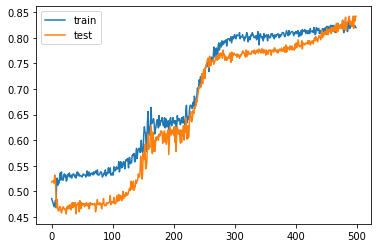

In [24]:
# generate 2d classification dataset
X, y = make_circles(n_samples = 1000, noise = 0.1, random_state = 1)

# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range = (-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
init = RandomUniform(minval = 0, maxval = 1)
model.add(Dense(5, input_dim = 2, activation = 'tanh', kernel_initializer = init))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = init))

# compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 500, verbose = 0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

The plot suggests, for this run, that the performance begins to slow around epoch 300 at about 80% accuracy for both the train and test sets.

__Note__: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## Deeper MLP Model for Two Circles Problem

Traditionally, developing deep Multilayer Perceptron models was challenging.

Deep models using the hyperbolic tangent activation function do not train easily, and much of this poor performance is blamed on the vanishing gradient problem.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

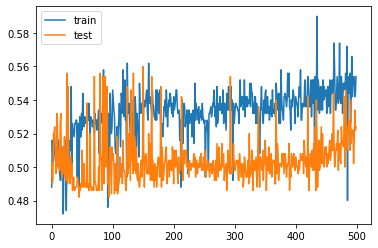

In [34]:
# define model
init = RandomUniform(minval = 0, maxval = 1)
model = Sequential()
model.add(Dense(5, input_dim = 2, activation = 'tanh', kernel_initializer = init))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init))
model.add(Dense(5, activation = 'tanh', kernel_initializer = init))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = init))

# compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 500, verbose = 0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

In this case, we can see that performance is quite poor on both the train and test sets achieving around 50% accuracy. This suggests that the model as configured could not learn the problem nor generalize a solution.

The line plots of model accuracy on the train and test sets during training tell a similar story. We can see that performance is bad and actually gets worse as training progresses.

## Deeper MLP Model with ReLU for Two Circles Problem

The rectified linear activation function has supplanted the hyperbolic tangent activation function as the new preferred default when developing Multilayer Perceptron networks, as well as other network types like CNNs.

This is because the activation function looks and acts like a linear function, making it easier to train and less likely to saturate, but is, in fact, a nonlinear function, forcing negative inputs to the value 0. It is claimed as one possible approach to addressing the vanishing gradients problem when training deeper models.

When using the rectified linear activation function (or ReLU for short), it is good practice to use the __He weight initialization scheme__. We can define the MLP with five hidden layers using ReLU and He initialization, listed below.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

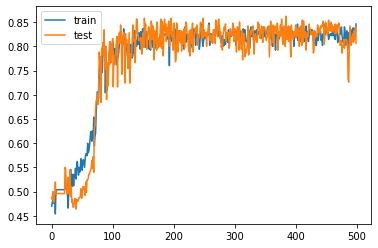

In [33]:
# define model
model = Sequential()
model.add(Dense(5, input_dim = 2, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

# compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 500, verbose = 0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

The model appears to rapidly learn the problem, converging on a solution in about 100 epochs.

__Use of the ReLU activation function has allowed us to fit a much deeper model for this simple problem, but this capability does not extend infinitely.__ For example, increasing the number of layers results in slower learning to a point at about 20 layers where the model is no longer capable of learning the problem, at least with the chosen configuration.

Although use of the ReLU worked, we cannot be confident that use of the tanh function failed because of vanishing gradients and ReLU succeed because it overcame this problem.

## Review Average Gradient Size During Training
This section assumes that you are using the __TensorFlow backend with Keras__.

Keras provides the TensorBoard callback that can be used to log properties of the model during training such as the average gradient per layer. These statistics can then be reviewed using the TensorBoard interface that is provided with TensorFlow.

In the cases of using the tanh activation function, we know the network has more than enough capacity to learn the problem, but the increase in layers has prevented it from doing so.

It is hard to diagnose a vanishing gradient as a cause for bad performance. One possible signal is to review the average size of the gradient per layer per training epoch.

We would expect layers closer to the output to have a larger average gradient than those layers closer to the input.

In [41]:
from tensorflow.keras.callbacks import TensorBoard

#### deep MLP model using tanh

In [47]:
# define model
init = RandomUniform(minval = 0, maxval = 1)
model = Sequential()
model.add(Dense(5, input_dim = 2, activation = 'tanh', kernel_initializer = init))
model.add(Dense(5, activation = 'tanh', kernel_initializer=init))
model.add(Dense(5, activation = 'tanh', kernel_initializer=init))
model.add(Dense(5, activation = 'tanh', kernel_initializer=init))
model.add(Dense(5, activation = 'tanh', kernel_initializer=init))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer=init))

# compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# prepare callback
tb = TensorBoard(histogram_freq = 1, write_grads = True)

# fit model
model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 500, verbose = 0, callbacks = [tb])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

Running the example creates a new “logs/” subdirectory with a file containing the statistics recorded by the callback during training.

We can review the statistics in the TensorBoard web interface. The interface can be started from the command line, requiring that you specify the full path to your logs directory.

In [43]:
# load the TensorBoard notebook extension
%load_ext tensorboard

In [51]:
# clear any logs from previous runs
# rm -rf ./logs/

In [48]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 69469), started 0:09:46 ago. (Use '!kill 69469' to kill it.)

First, line plots are created for each of the 6 layers (5 hidden, 1 output). The names of the plots indicate the layer, where “dense_1” indicates the hidden layer after the input layer and “dense_6” represents the output layer.

We can see that the output layer has a lot of activity over the entire run, with average gradients per epoch at around 0.05 to 0.1. We can also see some activity in the first hidden layer with a similar range. Therefore, gradients are getting through to the first hidden layer, but the last layer and last hidden layer is seeing most of the activity.

#### deep MLP with the ReLU activation function

In [52]:
# define model
model = Sequential()
model.add(Dense(5, input_dim = 2, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

# compile model
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# prepare callback
tb = TensorBoard(histogram_freq = 1, write_grads = True)

# fit model
model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 500, verbose = 0, callbacks = [tb])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

In [53]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 69469), started 0:15:40 ago. (Use '!kill 69469' to kill it.)

The plots of the average gradient per layer per training epoch show a different story as compared to the gradients for the deep model with tanh.

We can see that the first hidden layer sees more gradients, more consistently with larger spread, perhaps 0.2 to 0.4, as opposed to 0.05 and 0.1 seen with tanh. We can also see that the middle hidden layers see large gradients.

__The ReLU activation function is allowing more gradient to flow backward through the model during training, and this may be the cause for improved performance.__

## Extensions

* __Weight Initialization__. Update the deep MLP with tanh activation to use Xavier uniform weight initialization and report the results.
* __Learning Algorithm__. Update the deep MLP with tanh activation to use an adaptive learning algorithm such as Adam and report the results.
* __Weight Changes__. Update the tanh and relu examples to record and plot the L1 vector norm of model weights each epoch as a proxy for how much each layer is changed during training and compare results.
* __Study Model Depth__. Create an experiment using the MLP with tanh activation and report the performance of models as the number of hidden layers is increased from 1 to 10.
* __Increase Breadth__. Increase the number of nodes in the hidden layers of the MLP with tanh activation from 5 to 25 and report performance as the number of layers are increased from 1 to 10.

__Comments__:
* Same results of deep neural when I used tanh and He initialization instead of RelU and He initialization.